In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import joblib as jb
from lightgbm import LGBMRegressor
import math
import cv2
import matplotlib.patches as mpatches
import colorsys

# Visualization - Bands and CSPM

In [2]:
data_path = '../data/generated_baseline/convolution_cspm/'
charts_path = '../charts/error_visualization/baseline_convolution_bands_cspm_low_var/'

In [3]:
val_data = jb.load(f'{data_path}val_data_bands_cspm_baseline_convolution_low_var.pkl.z')
val_data

,b1,b5,b6,cspmb7,z,x,y,rf_pred,lgbm_pred,rf_pred_smooth
0,0.1199,0.0490,0.0316,23.382784,3.195862,233,1130,3.222788,3.253044,3.186103
3,0.1199,0.0488,0.0324,23.158824,3.268182,233,1133,3.306878,3.277826,3.241882
5,0.1196,0.0489,0.0323,23.607309,3.294375,233,1135,3.206168,3.640472,3.241882
8,0.1224,0.0554,0.0345,28.922021,2.230000,234,1003,2.542534,3.519446,2.632087
14,0.1223,0.0535,0.0338,27.742739,2.258305,234,1009,2.878162,4.184618,2.708872
...,...,...,...,...,...,...,...,...,...,...
19262,0.1278,0.0474,0.0288,22.935431,4.471071,2281,78,7.281293,5.725309,6.354718
19275,0.1256,0.0438,0.0280,21.717054,3.169375,2289,83,3.969376,7.240660,3.969376
19276,0.1256,0.0436,0.0275,20.408150,3.026562,2290,83,8.460267,8.530231,8.460267
19283,0.1267,0.0482,0.0295,23.945153,1.909714,2294,86,3.069145,5.053403,3.069145


In [4]:
val_data['z_pred'] = val_data['rf_pred_smooth']
val_data.drop(['rf_pred','rf_pred_smooth', 'lgbm_pred'], axis=1, inplace=True)
val_data.head()

,b1,b5,b6,cspmb7,z,x,y,z_pred
0,0.1199,0.0490,0.0316,23.382784,3.195862,233,1130,3.186103
3,0.1199,0.0488,0.0324,23.158824,3.268182,233,1133,3.241882
5,0.1196,0.0489,0.0323,23.607309,3.294375,233,1135,3.241882
8,0.1224,0.0554,0.0345,28.922021,2.230000,234,1003,2.632087
14,0.1223,0.0535,0.0338,27.742739,2.258305,234,1009,2.708872


In [5]:
df_data = val_data
df_data['error'] = df_data['z_pred'] - df_data['z']
df_data['abs_error'] = abs(df_data['error'])

In [6]:
df_data

,b1,b5,b6,cspmb7,z,x,y,z_pred,error,abs_error
0,0.1199,0.0490,0.0316,23.382784,3.195862,233,1130,3.186103,-0.009759,0.009759
3,0.1199,0.0488,0.0324,23.158824,3.268182,233,1133,3.241882,-0.026300,0.026300
5,0.1196,0.0489,0.0323,23.607309,3.294375,233,1135,3.241882,-0.052493,0.052493
8,0.1224,0.0554,0.0345,28.922021,2.230000,234,1003,2.632087,0.402087,0.402087
14,0.1223,0.0535,0.0338,27.742739,2.258305,234,1009,2.708872,0.450567,0.450567
...,...,...,...,...,...,...,...,...,...,...
19262,0.1278,0.0474,0.0288,22.935431,4.471071,2281,78,6.354718,1.883647,1.883647
19275,0.1256,0.0438,0.0280,21.717054,3.169375,2289,83,3.969376,0.800001,0.800001
19276,0.1256,0.0436,0.0275,20.408150,3.026562,2290,83,8.460267,5.433705,5.433705
19283,0.1267,0.0482,0.0295,23.945153,1.909714,2294,86,3.069145,1.159431,1.159431


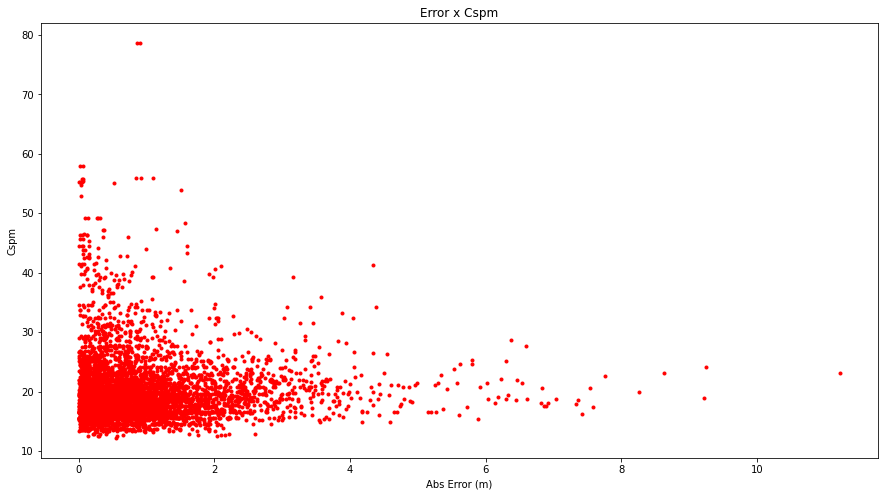

In [7]:
plt.figure(figsize=(15,8))
plt.plot(df_data['abs_error'], df_data['cspmb7'], 'r.')
plt.xlabel("Abs Error (m)")
plt.ylabel("Cspm")
plt.title('Error x Cspm')
plt.savefig(f'{charts_path}chart_abs_error_x_cspm.jpg')
#plt.grid()
plt.show()

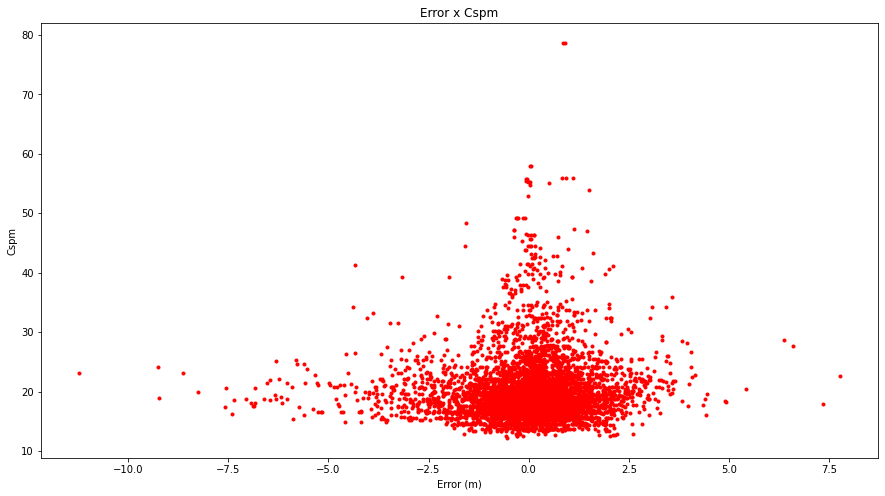

In [8]:
plt.figure(figsize=(15,8))
plt.plot(df_data['error'], df_data['cspmb7'], 'r.')
plt.xlabel("Error (m)")
plt.ylabel("Cspm")
plt.title('Error x Cspm')
plt.savefig(f'{charts_path}chart_error_x_cspm.jpg')
#plt.grid()
plt.show()

In [13]:
df_result = df_data.drop(['b1','b5','b6'],axis=1)

In [14]:
df_result['z_mean_rd'] = df_result['z'].apply(np.floor)

In [15]:
df_depth = df_result.drop(['x','y','z_pred','z'],axis=1).groupby('z_mean_rd').mean().reset_index()
df_depth.columns = ['depth_round_down','cspm','mean_error','mean_abs_error']
df_depth

,depth_round_down,cspm,mean_error,mean_abs_error
0,1.0,21.182297,1.224779,1.224779
1,2.0,21.723086,0.970784,0.974076
2,3.0,20.972719,0.751955,0.820369
3,4.0,21.100549,0.362385,0.589329
4,5.0,19.659353,0.150473,0.560371
5,6.0,19.002370,-0.015336,0.651891
6,7.0,19.375164,-0.249461,0.678992
7,8.0,18.899857,-0.216548,0.765057
8,9.0,18.735024,-0.664202,0.936191
9,10.0,18.633894,-0.571504,1.115088


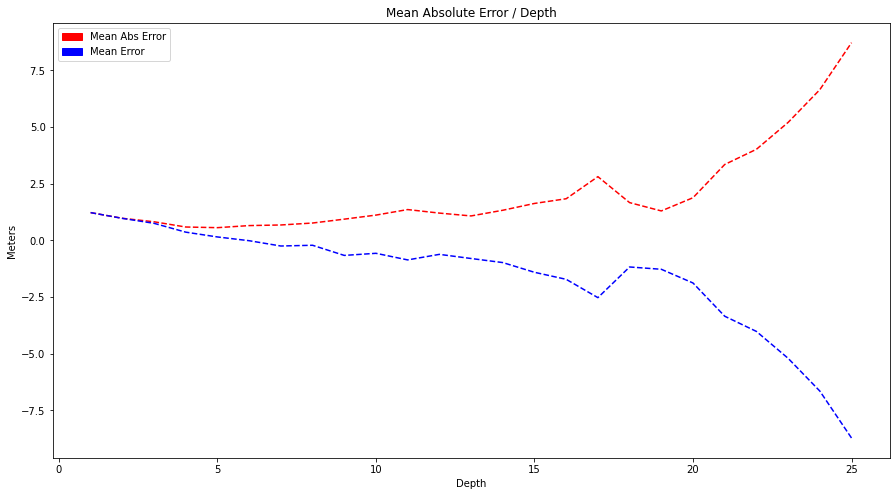

In [16]:
plt.figure(figsize=(15,8))
plt.plot(df_depth['depth_round_down'], df_depth['mean_abs_error'], 'r--', df_depth['depth_round_down'], df_depth['mean_error'], 'b--')
red = mpatches.Patch(color='red', label='Mean Abs Error')
blue = mpatches.Patch(color='blue', label='Mean Error')
plt.legend(handles=[red,blue])
plt.xlabel("Depth")
plt.ylabel("Meters")
plt.savefig(f'{charts_path}chart_mean_error.jpg')
plt.title('Mean Absolute Error / Depth')
#plt.grid()
plt.show()

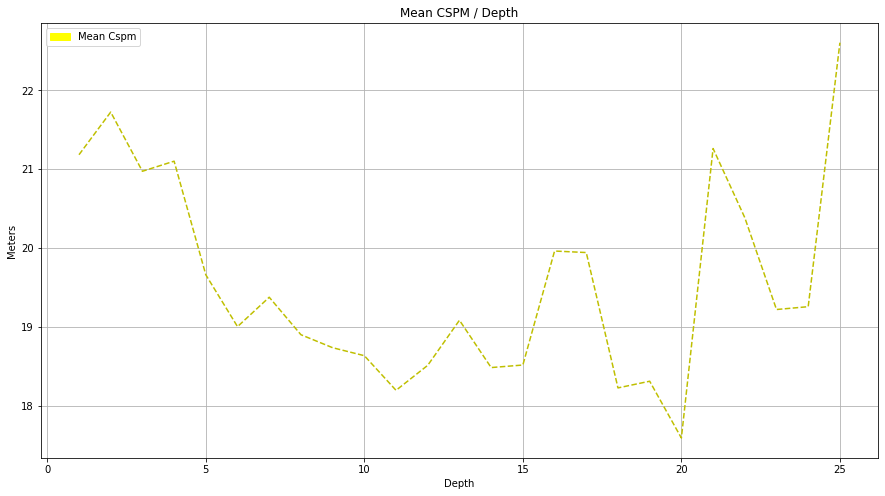

In [17]:
plt.figure(figsize=(15,8))
plt.plot(df_depth['depth_round_down'], df_depth['cspm'], 'y--')
yellow = mpatches.Patch(color='yellow', label='Mean Cspm')
plt.legend(handles=[yellow])
plt.xlabel("Depth")
plt.ylabel("Meters")
plt.savefig(f'{charts_path}chart_mean_cspm.jpg')
plt.title('Mean CSPM / Depth')
plt.grid()
plt.show()

In [20]:
base_image = cv2.imread(f'{charts_path}rgb_image.jpg')

In [21]:
transects_image = base_image.copy()
for i, row in enumerate(df_data.itertuples()):
    x = row[-5]
    y = row[-4]
    transects_image[y][x] = [255,255,255]
cv2.imwrite(f'{charts_path}bat_transects.jpg',transects_image)

True

In [22]:
abs_error_image = base_image.copy()
for i, row in enumerate(df_data.itertuples()):
    x = int(row[-5])
    y = int(row[-4])
    abs_error = row[-1]
    abs_error_image[y][x] = [int(e*255) for e in (colorsys.hls_to_rgb(abs_error/(df_data['abs_error'].max()*1.2), 0.5, 1))]

cv2.imwrite(f'{charts_path}abs_error.jpg',cv2.cvtColor(abs_error_image, cv2.COLOR_BGR2RGB))

True

In [23]:
cspm_image = base_image.copy()
for i, row in enumerate(df_data.itertuples()):
    x = int(row[-5])
    y = int(row[-4])
    cspm = row[-7]
    cspm_image[y][x] = [int(e*255) for e in (colorsys.hls_to_rgb(cspm/(df_data['cspmb7'].max()*1.2), 0.5, 1))]

cv2.imwrite(f'{charts_path}cspm.jpg',cv2.cvtColor(cspm_image, cv2.COLOR_BGR2RGB))

True

In [24]:
def find_transect(x_s, y_s, x_e, y_e, df):
    transect = list()
    angle = math.atan2(y_s-y_e, x_s-x_e)
    low_x, high_x = (x_s, x_e) if x_s < x_e else (x_e, x_s)
    low_y, high_y = (y_s, y_e) if y_s < y_e else (y_e, y_s)
    df_t = df[(df['x'] >= low_x) & (df['x'] <= high_x)]
    df_t = df_t[(df_t['y'] >= low_y) & (df_t['y'] <= high_y)]
    for i, row in enumerate(df_t.itertuples()):
        #print(row)
        x = row[-5] # change this to dynamic 
        y = row[-4] # change this to dynamic 
        angle2 = math.atan2(y-y_e,x-x_e)
        if abs(angle2 - angle) < 0.05:
            transect.append(row)
    return transect
    

In [25]:
def generate_transect_charts(df_data, coords, path, image=None):
    transect = find_transect(coords[0],coords[1],coords[2],coords[3],df_data)
    
    if image is not None:
        transect_image = image.copy()
        for i, row in enumerate(transect):
            x = row[1] # Change this to dynamic
            y = row[2] # change this to dynamic
            transect_image[y][x] = [0,255,0]

        cv2.imwrite(f'{path}bat_single_transect_{coords[0]}_{coords[1]}.jpg',transect_image)

    df_transect = pd.DataFrame(transect)
    #print(df_transect.head())
    df_transect.drop(['Index'], axis=1, inplace=True)

    plt.figure(figsize=(15,8))
    plt.plot(df_transect['x'],-df_transect['z'], 'r-', df_transect['x'],-df_transect['z_pred'], 'b-')
    red = mpatches.Patch(color='red', label='Bathymetry')
    blue = mpatches.Patch(color='blue', label='Prediction')
    plt.legend(handles=[red,blue])
    plt.xlabel("Pixel X Coord")
    plt.ylabel("Depth(m)")
    plt.savefig(f'{path}chart_bat_pred_{coords[0]}_{coords[1]}.jpg')

    plt.figure(figsize=(15,8))
    plt.plot(df_transect['x'],df_transect['error'], 'g.')
    lbl = mpatches.Patch(color='green', label='Error')
    plt.legend(handles=[lbl])
    plt.xlabel("Pixel X Coord")
    plt.ylabel("Meter")
    plt.savefig(f'{path}chart_error_{coords[0]}_{coords[1]}.jpg')

    plt.figure(figsize=(15,8))
    plt.plot(df_transect['x'],df_transect['abs_error'], 'm.')
    lbl = mpatches.Patch(color='magenta', label='Abs Error')
    plt.legend(handles=[lbl])
    plt.xlabel("Pixel X Coord")
    plt.ylabel("Meter")
    plt.savefig(f'{path}chart_abs_error_{coords[0]}_{coords[1]}.jpg')
    
    plt.figure(figsize=(15,8))
    plt.plot(df_transect['x'],df_transect['cspmb7'], 'y.')
    lbl = mpatches.Patch(color='yellow', label='Cspm')
    plt.legend(handles=[lbl])
    plt.xlabel("Pixel X Coord")
    plt.ylabel("Cspm")
    plt.savefig(f'{path}cspm_{coords[0]}_{coords[1]}.jpg')


In [26]:
transect_coords = [[510,410,680,310],
                   [1604,142,1772,440],
                   [871,1123,1190,939],
                   [1020,705,1319,532]]

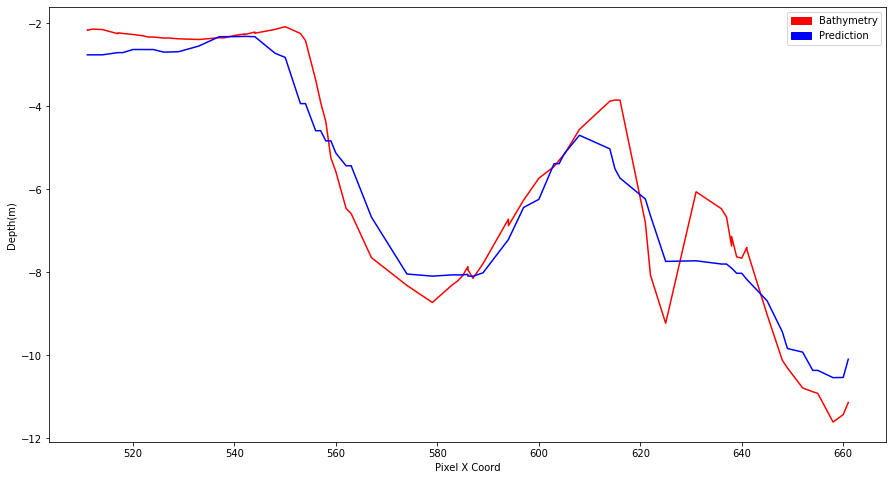

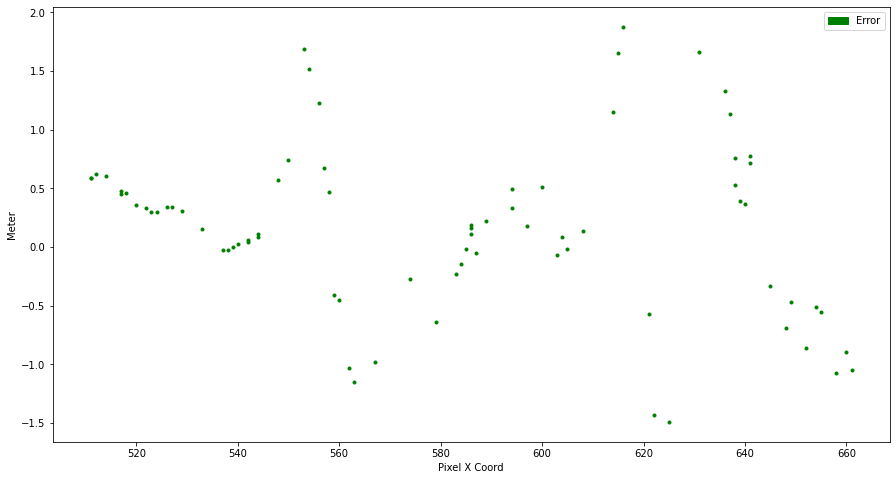

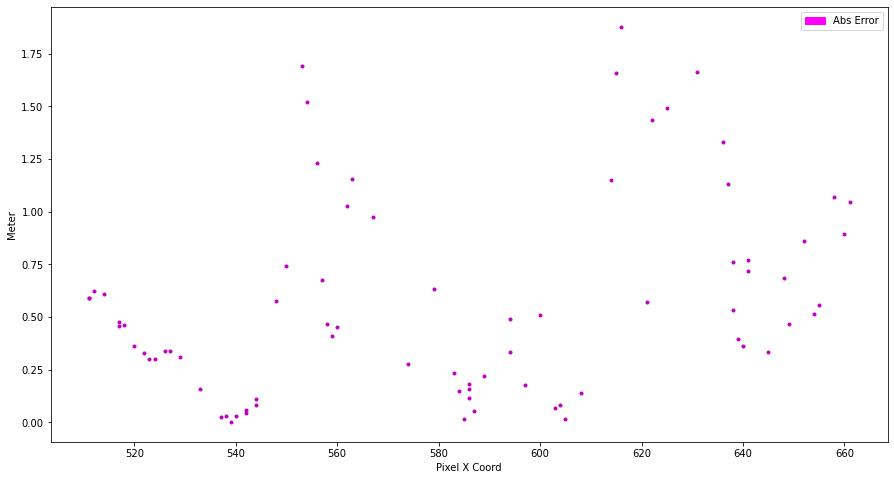

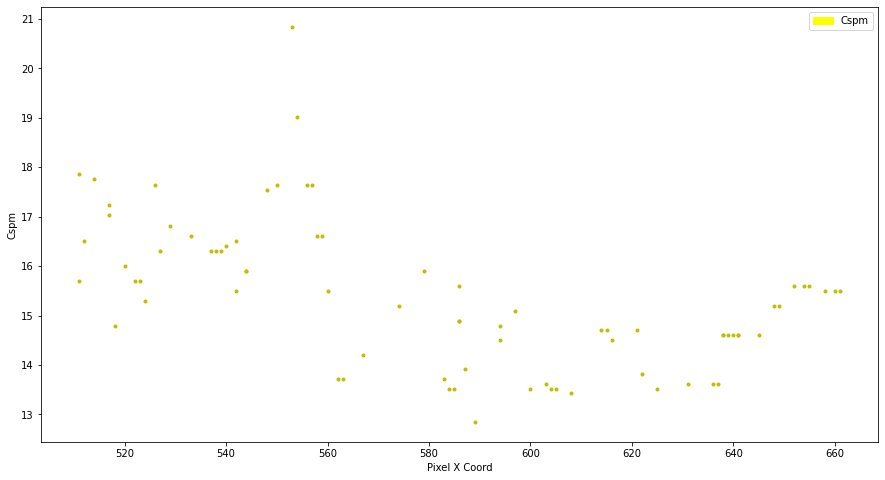

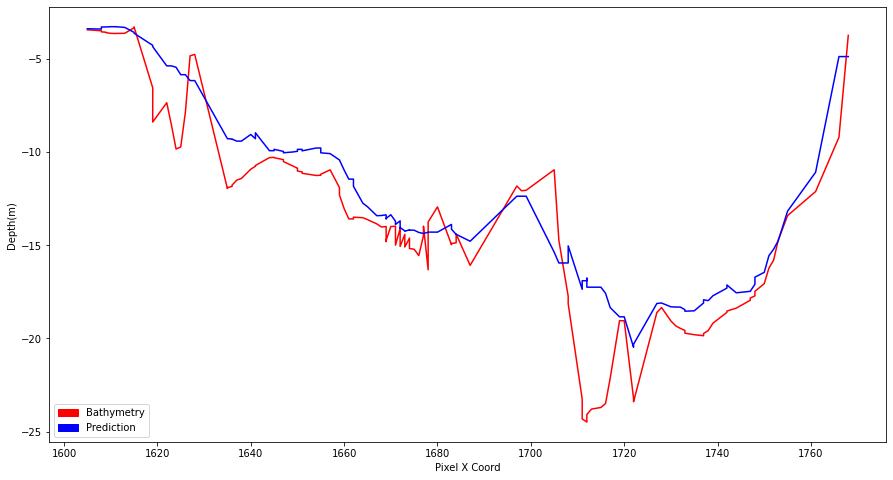

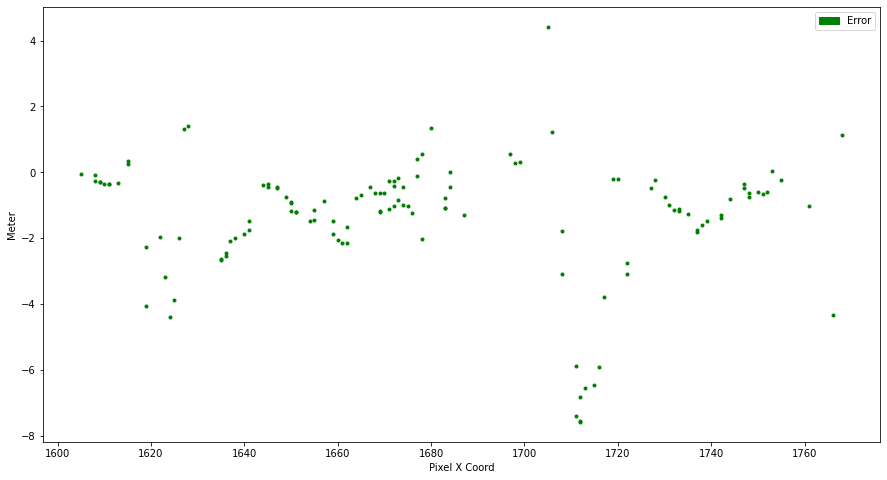

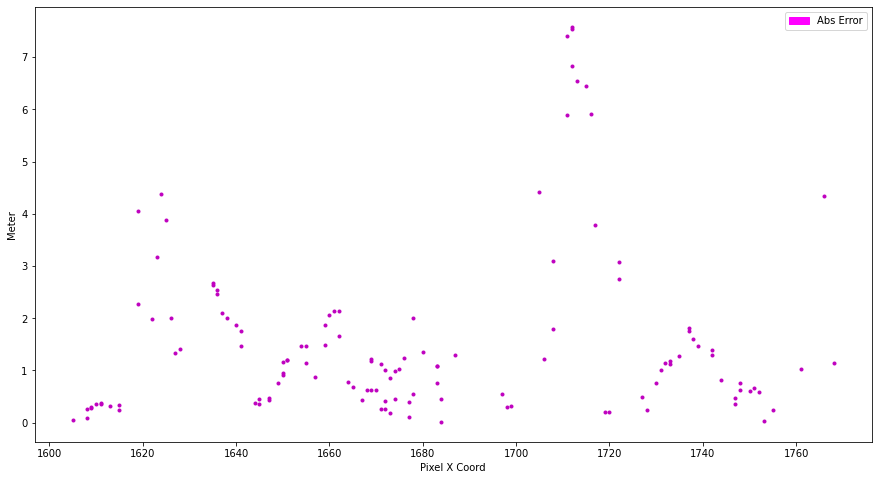

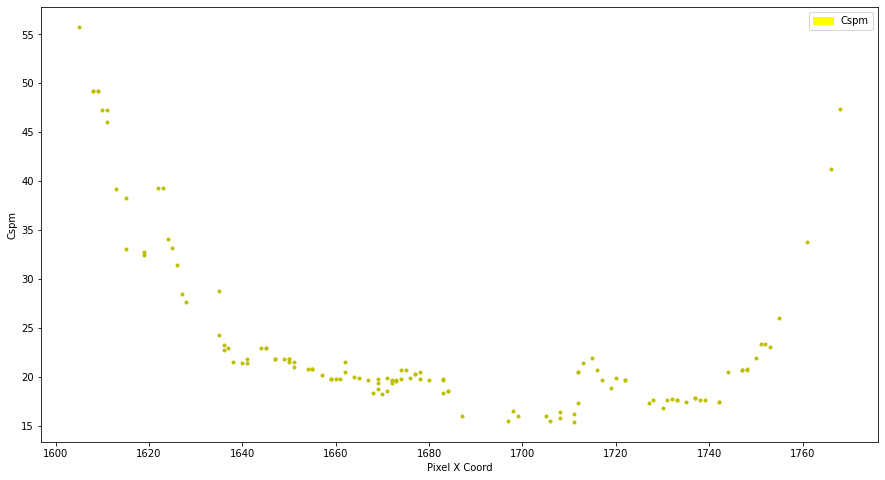

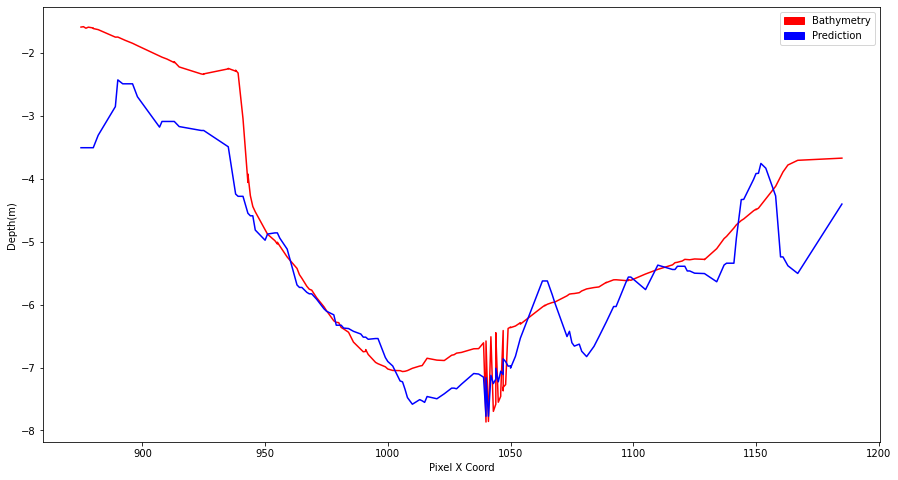

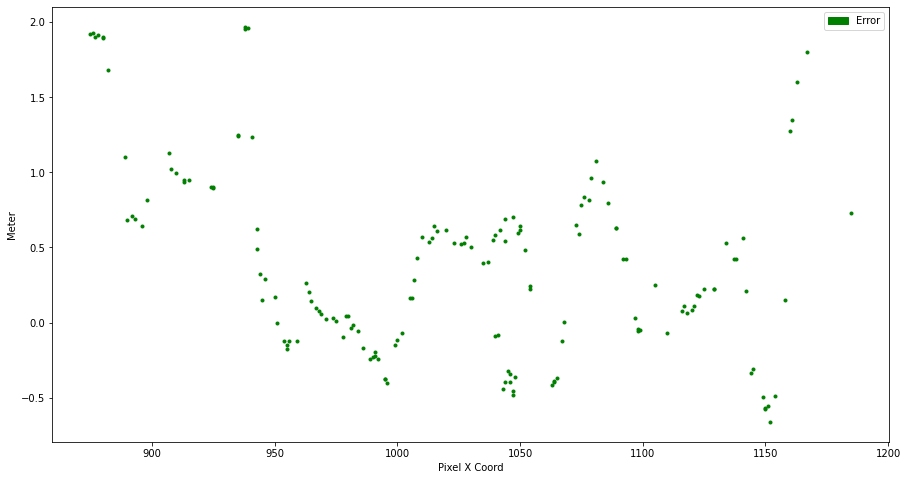

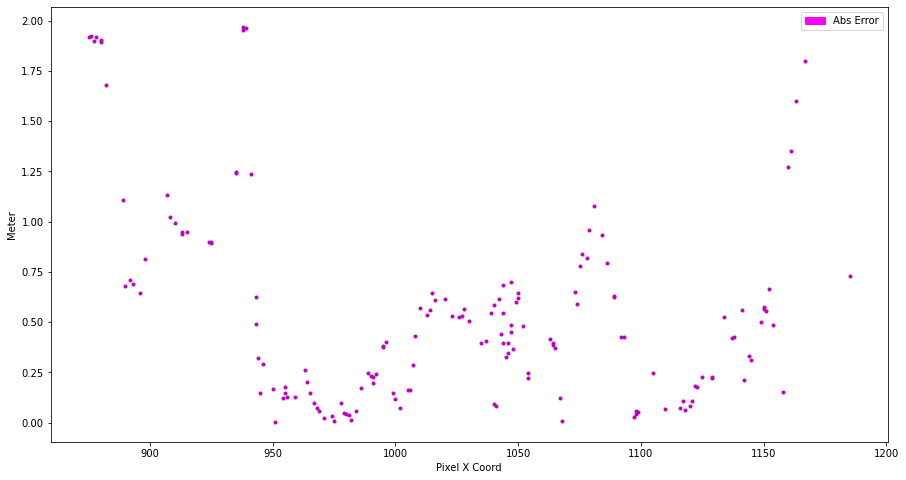

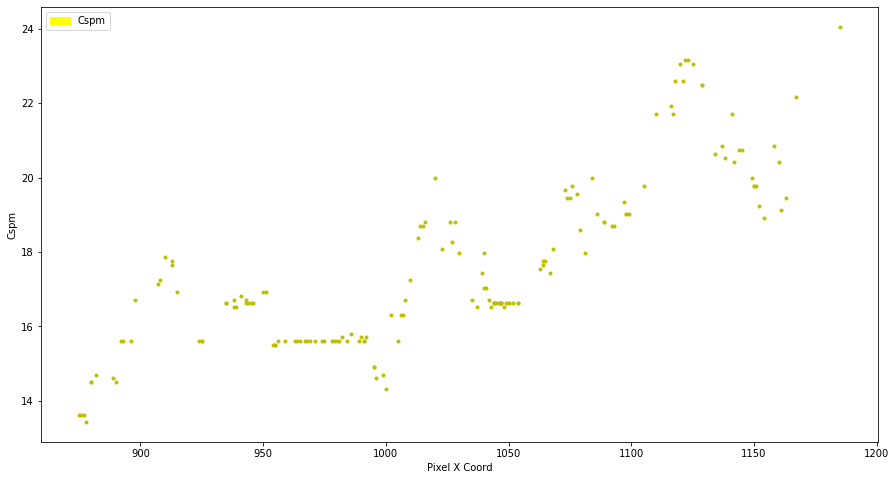

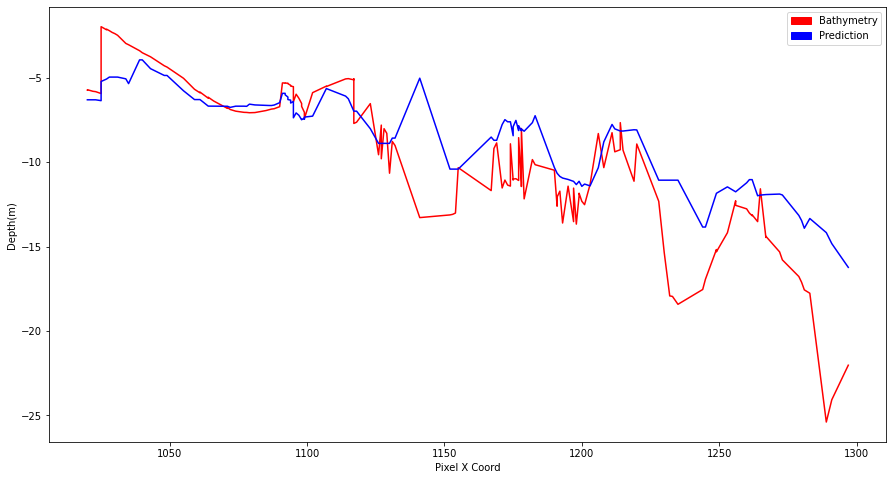

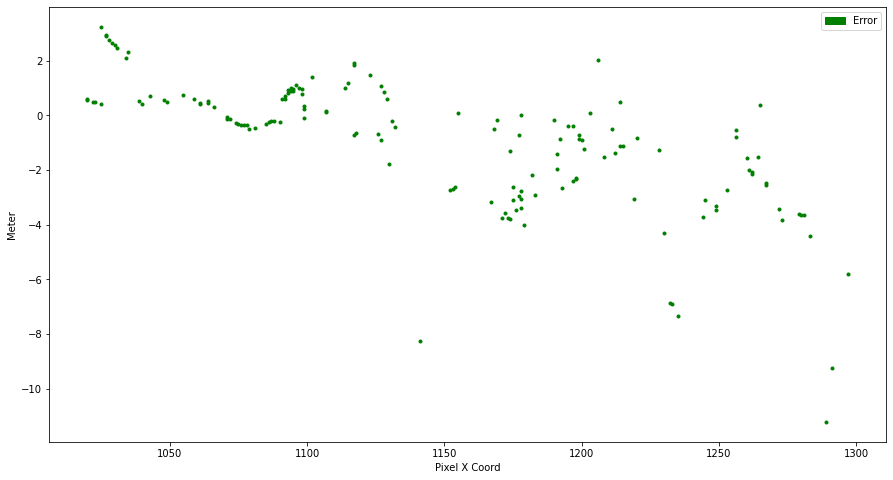

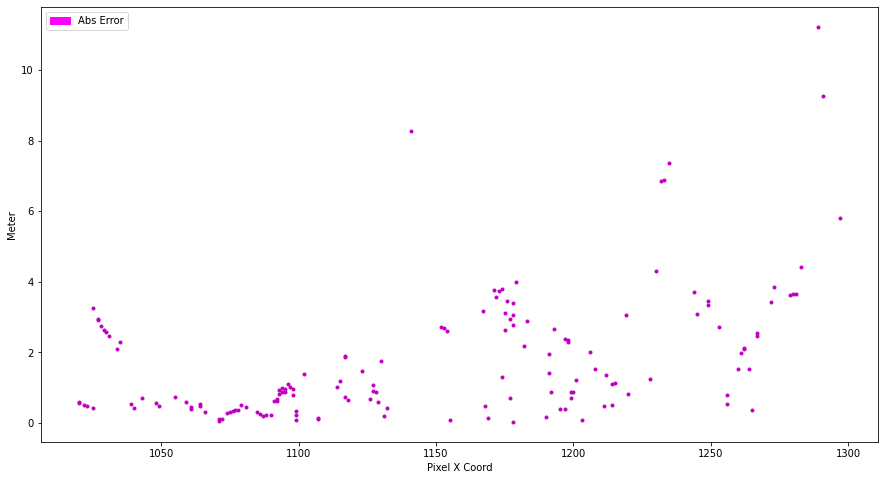

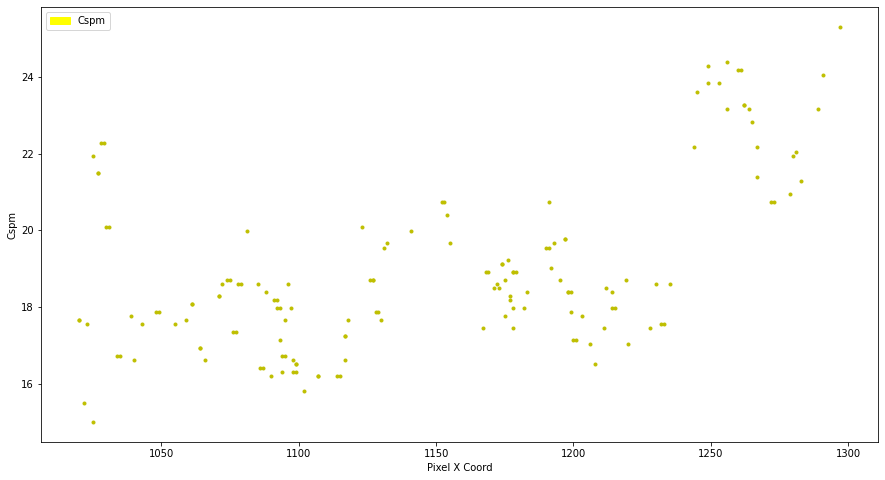

In [27]:
for i, coords in enumerate(transect_coords):
    generate_transect_charts(df_data, coords, charts_path, None)